In [37]:
import torch
from pathlib import Path
import matplotlib.pyplot as plt

tkwargs = {
    "dtype": torch.double,# Datatype used by tensors
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"), # Declares the 'device' location where the Tenosrs will be stored
}

In [38]:

indir = Path("Comp_01" + "/Data")

names = ['train_x','train_n','train_y','train_sigma2','x_strs','f_strs']
models = ['vanilla','IG']
big_dict = {}
for m in models:
	data_in = {}
	for name in names:

					load_in = torch.load(indir /  f"{m}_{name}.pt")
					data_in[name] = load_in.to(**tkwargs)
	big_dict[m] = data_in

names_test = ['test_x','test_y','test_sigma2']

test_dict= {}
indir = Path("Comp_01" + "/Input")
for name in names_test:
	load_in = torch.load(indir /  f"{name}.pt")
	test_dict[name] = load_in.to(**tkwargs)


Text(0.5, 0.98, 'Test Problem')

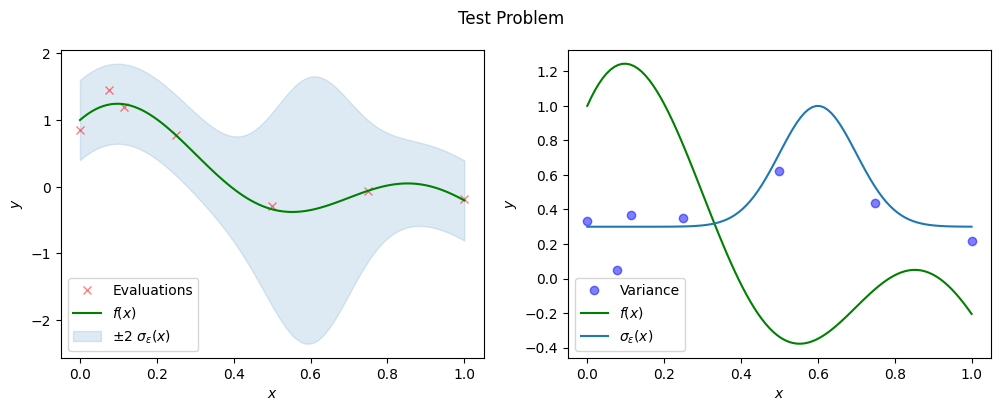

In [44]:
data =big_dict['IG']

iter = 0

test_x = test_dict['test_x']
test_y = test_dict['test_y']
test_sigma2 = test_dict['test_sigma2']

train_x = data['train_x'][iter]
train_y = data['train_y'][iter]
train_sigma2 = data['train_sigma2'][iter]

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(train_x,train_y, "x",color="r", label="Evaluations", alpha=0.5)
ax[1].plot(train_x,torch.sqrt(train_sigma2), "o",color="b", label="Variance", alpha=0.5)
ax[0].plot(test_x,test_y,color='g',label='$f(x)$')
ax[0].fill_between(
    test_x.squeeze(),
    test_y.squeeze() - 2 * torch.sqrt(test_sigma2).squeeze(),
    test_y.squeeze() + 2 * torch.sqrt(test_sigma2).squeeze(),
    color="C0",
    alpha=0.15,
    label="±2 $\\sigma_{\\varepsilon}(x)$",
)

ax[1].plot(test_x,test_y,color='g',label='$f(x)$')
ax[1].plot(test_x,torch.sqrt(test_sigma2),color='C0',label='$\\sigma_{\\varepsilon}(x)$')

ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")

ax[0].legend(loc="lower left")
ax[1].legend(loc="lower left")
#ax[1].set_title("Heteroscedastic regression")
fig.suptitle('Test Problem')